# Cancer Metrics

### Theory

#### Importing modules and data

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

Cancer_full_data = pd.read_csv("C:/Users/jony0/Downloads/CV_training/CV_training/data_science/1_metrics/CANCER_TABLE.csv")
Cancer_full_data['bigger_than_7'] = Cancer_full_data['diameter (cm)'] > 7
Cancer_full_data

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\jony0\miniconda3\lib\site-packages\sklearn\metrics\__init__.py)

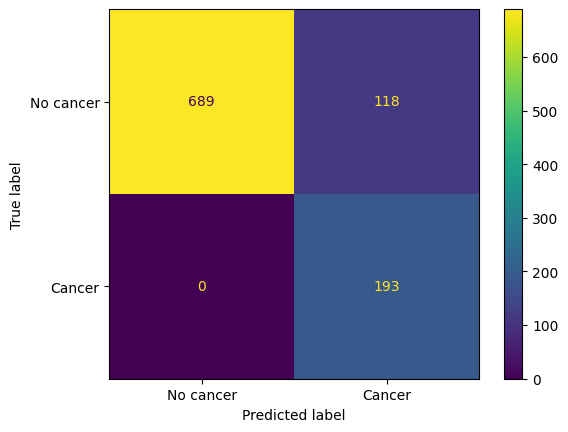

In [17]:
matrix = confusion_matrix(Cancer_full_data[' cancer'], Cancer_full_data['bigger_than_7'])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No cancer', 'Cancer'])
disp.plot()
plt.show()

In [18]:
TP = matrix[1][1]
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
print("TP = {}".format(TP))
print("TN = {}".format(TN))
print("FP = {}".format(FP))
print("FN = {}".format(FN))


TP = 193
TN = 689
FP = 118
FN = 0



##### TP, TN, FP, FN are the building blocks from which we can infer more complicated information. For example, TP gives us the amount of times we predicted a positive outcome (in this case - cancer) and were correct, while FN is the number of times we predicted a negative outcome and were wrong (the outcome was actually positive).

In [19]:
print("TPR = {}".format(TP/(TP+FN)))
print("FPR = {}".format(FP/(TN+FP)))


TPR = 1.0
FPR = 0.14622057001239158


In [20]:
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
print("Recall = {}".format(Recall))
print("Accuracy = {}".format((TP+TN)/(TP+FN+TN+FP)))
print("Precision = {}".format(Precision))
print("f1 = {}".format((2*Recall*Precision)/(Recall+Precision)))

Recall = 1.0
Accuracy = 0.882
Precision = 0.6205787781350482
f1 = 0.7658730158730159



##### TPR's meaning is the number of times we predicted a positive outcome correctly out of the entirety of positive outcomes. Cancer is a great example for that - TPR is the fraction of sick patients who we were able to diagnose as patients.
##### The FPR is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events.
##### This statistic can be very useful in cases like removing cancer tumors - We would like to know what percent of tumors we couldn't were correctly identified as those we couldn't remove.

### Excercise 

##### Such a model would be better in a sense because it will better convey the complexity of the data.
##### For example - in our current state, if a certain record is classified as having cancer, we're not aware of the likelihood of classification, it might be almost certain, but it might also be close to a 50-50 situation.
##### This can affect the way we deal the data afterwards, if the classification isn't very certain, we might want to check it again, and thus eventually gain better metrics overall.

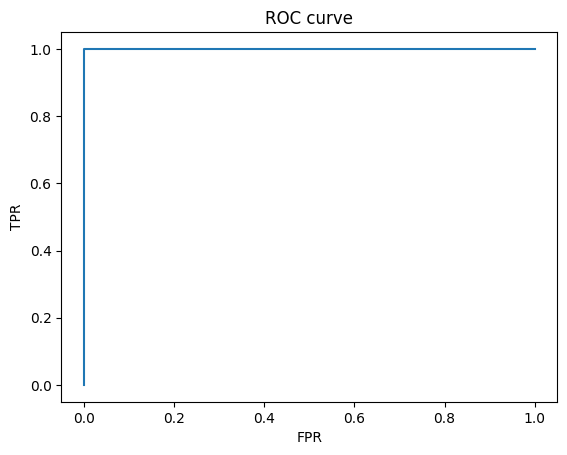

In [56]:
def calculate_FPR_TPR(threshold):
    cancer_func_data = Cancer_full_data.copy()
    column_name = "bigger_than_{}".format(threshold)
    cancer_func_data[column_name] = Cancer_full_data['diameter (cm)'] > threshold
    matrix = confusion_matrix(cancer_func_data[' cancer'], cancer_func_data[column_name])
    return matrix[1][1]/(matrix[1][1]+matrix[1][0]), matrix[0][1]/(matrix[0][1]+matrix[0][0])

thresholds = [0,1,2,3,4,4.5,5,5.5,6,6.5,6.75,7,7.25,7.5,7.75,8, 8.25,8.5,8.75,9,10]
results = np.array([calculate_FPR_TPR(threshold) for threshold in thresholds[::-1]])
plt.plot(results[:,1],results[:,0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


##### We can see according to the graph that at a certain point we get a TPR of 1 and a FPR of 0, meaning that we found a perfect classifier, which is "diameter">8.

##### Thus we can also concur that the area under the curve, or AUC, is 1. This proves that the model is very good, because an AUC of 1 tells us that we have a perfect classifier on the data, and we can always (based on this dataset) predict correctly the existence of cancer.


In [60]:
Cancer_full_data['bigger_than_8'] = Cancer_full_data['diameter (cm)'] > 8
Cancer_full_data.drop(columns=['bigger_than_7'])



,diameter (cm),cancer,bigger_than_8
0,6.309685,False,False
1,4.580894,False,False
2,6.310071,False,False
3,7.495139,False,False
4,2.216181,False,False
...,...,...,...
995,7.831124,False,False
996,4.614356,False,False
997,6.988584,False,False
998,1.367865,False,False


##### We now transformed the model to a classification model based on whether the diameter is larger or smaller than 8. This way we get a classification model with a perfect accuracy and precision, we got that from the roc curve and the fact that at a certain point (8) we have a perfect TPR and FPR = 0.

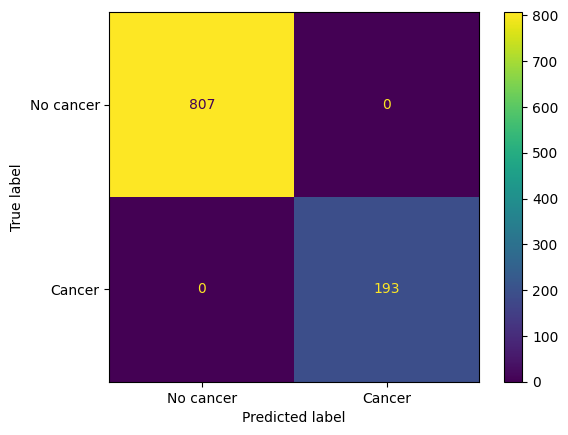

In [61]:
matrix = confusion_matrix(Cancer_full_data[' cancer'], Cancer_full_data['bigger_than_8'])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No cancer', 'Cancer'])
disp.plot()
plt.show()


##### We can clearly see that the confusion matrix is "perfect", we have no wrong prediction. 

In [62]:
TP = matrix[1][1]
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
print("TP = {}".format(TP))
print("TN = {}".format(TN))
print("FP = {}".format(FP))
print("FN = {}".format(FN))
print("TPR = {}".format(TP/(TP+FN)))
print("FPR = {}".format(FP/(TN+FP)))
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
print("Recall = {}".format(Recall))
print("Accuracy = {}".format((TP+TN)/(TP+FN+TN+FP)))
print("Precision = {}".format(Precision))
print("f1 = {}".format((2*Recall*Precision)/(Recall+Precision)))

TP = 193
TN = 807
FP = 0
FN = 0
TPR = 1.0
FPR = 0.0
Recall = 1.0
Accuracy = 1.0
Precision = 1.0
f1 = 1.0


##### We can clearly see that this classification is significantly better, because although the TPRs and recalls are the same, here the accuracy, precision and f1 are all perfect due to us not having any misclassifications. I'd reccomend using this model, with 'diameter' = 8 as a threshold.

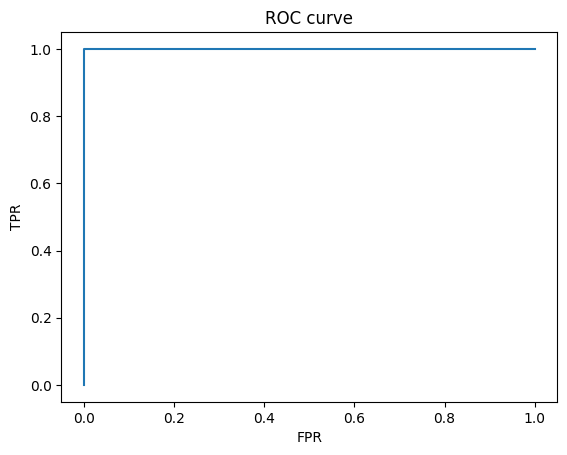

In [72]:
fpr, tpr, thresholds = roc_curve(Cancer_full_data[' cancer'], Cancer_full_data['diameter (cm)'])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()